In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import matplotlib
import seaborn as sns
%matplotlib inline

In [152]:
import sklearn

In [153]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [154]:
train = pd.read_csv("house_train.csv")

In [155]:
test = pd.read_csv("house_test.csv")

In [98]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL           65     8450   Pave   NaN      Reg   
1   2          20       RL           80     9600   Pave   NaN      Reg   
2   3          60       RL           68    11250   Pave   NaN      IR1   
3   4          70       RL           60     9550   Pave   NaN      IR1   
4   5          60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [112]:
#取得列名を番号で指定したいときにはiloc, ラベルで指定したいときはloc
all_data = pd.concat((train.iloc[:, 1:-1], test.iloc[:, 1:-1]))

In [113]:
all_data.shape

(2919, 79)

In [114]:
# check na value count
nullCnt = pd.DataFrame({'nullNums' : all_data.isnull().sum()})
nullCnt['DataType'] = all_data[nullCnt.index].dtypes

In [115]:
nullCnt[nullCnt['nullNums'] > 0].sort('DataType')

nullNums DataType
GarageArea            1  float64
TotalBsmtSF           1  float64
BsmtFinSF1            1  float64
BsmtFinSF2            1  float64
GarageYrBlt         159  float64
BsmtFullBath          2  float64
BsmtHalfBath          2  float64
GarageCars            1  float64
BsmtUnfSF             1  float64
MasVnrArea           23  float64
LotFrontage         486  float64
GarageType          157   object
KitchenQual           1   object
MasVnrType           24   object
MiscFeature        2814   object
PoolQC             2909   object
SaleCondition      1459   object
SaleType              1   object
MSZoning              4   object
GarageQual          159   object
Alley              2721   object
GarageCond          159   object
Functional            2   object
FireplaceQu        1420   object
Fence              2348   object
Exterior2nd           1   object
Exterior1st           1   object
Electrical            1   object
BsmtQual             81   object
BsmtFinType2         80   object
BsmtFinType1         79   object
BsmtExposure         82   object
BsmtCond             82   object
GarageFinish        159   object
Utilities             2   object

In [121]:
# Convert all object to categorical data
objColumns = all_data.dtypes[all_data.dtypes == 'object'].index
# There are several columns of categorical data represented as numeric. Convert them to categorical ones
# "|" :"または　"という意味
for name in objColumns | pd.Index(['MSSubClass']):
    all_data[name] = all_data[name].astype("category")

In [175]:
all_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0  6.753438  6.751101          0   NaN             3     1Fam       TA   
1  7.141245  0.000000          0   NaN             3     1Fam       TA   
2  6.825460  6.765039          0   NaN             3     1Fam       TA   
3  6.869014  6.629363          0   NaN             3     1Fam       Gd   
4  7.044033  6.960348          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No    6.561031           0  ...         WD           0    Pave   
1           Gd    6.886532           0  ...         WD           0    Pave   
2           Mn    6.188264           0  ...         WD           0    Pave   
3           No    5.379897           0  ...         WD           0    Pave   
4           Av    6.486161           0  ...         WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0      2.197225    6.753438     AllPub   0.000000      2003         2003   
1      1.945910    7.141245     AllPub   5.700444      1976         1976   
2      1.945910    6.825460     AllPub   0.000000      2001         2002   
3      2.079442    6.629363     AllPub   0.000000      1915         1970   
4      2.302585    7.044033     AllPub   5.262690      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 79 columns]

In [123]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null category
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null category
BsmtCond         2837 non-null category
BsmtExposure     2837 non-null category
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null category
BsmtFinType2     2839 non-null category
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null category
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null category
Condition1       2919 non-null category
Condition2       2919 non-null category
Electrical       2918 non-null category
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null category
ExterQual        2919 non-null cat

In [131]:
target = np.log1p(train['SalePrice'])

In [135]:
numColumns = all_data.dtypes[all_data.dtypes != 'category'].index

In [136]:
numColumns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [158]:
skewed_feats = all_data[numColumns].apply(lambda x: skew(x.dropna()))

In [159]:
skewed_feats = skewed_feats[skewed_feats > 0.75].index

In [160]:
all_data[skewed_feats].head()

1stFlrSF  2ndFlrSF  3SsnPorch  BsmtFinSF1  BsmtFinSF2  BsmtHalfBath  \
0       856       854          0         706           0             0   
1      1262         0          0         978           0             1   
2       920       866          0         486           0             0   
3       961       756          0         216           0             0   
4      1145      1053          0         655           0             0   

   BsmtUnfSF  EnclosedPorch  GrLivArea  KitchenAbvGr     ...      LotFrontage  \
0        150              0       1710             1     ...               65   
1        284              0       1262             1     ...               80   
2        434              0       1786             1     ...               68   
3        540            272       1717             1     ...               60   
4        490              0       2198             1     ...               84   

   LowQualFinSF  MasVnrArea  MiscVal  OpenPorchSF  PoolArea  ScreenPorch  \
0             0         196        0           61         0            0   
1             0           0        0            0         0            0   
2             0         162        0           42         0            0   
3             0           0        0           35         0            0   
4             0         350        0           84         0            0   

   TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  
0             8          856           0  
1             6         1262         298  
2             6          920           0  
3             7          756           0  
4             9         1145         192  

[5 rows x 21 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a98a278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11badfef0>]], dtype=object)

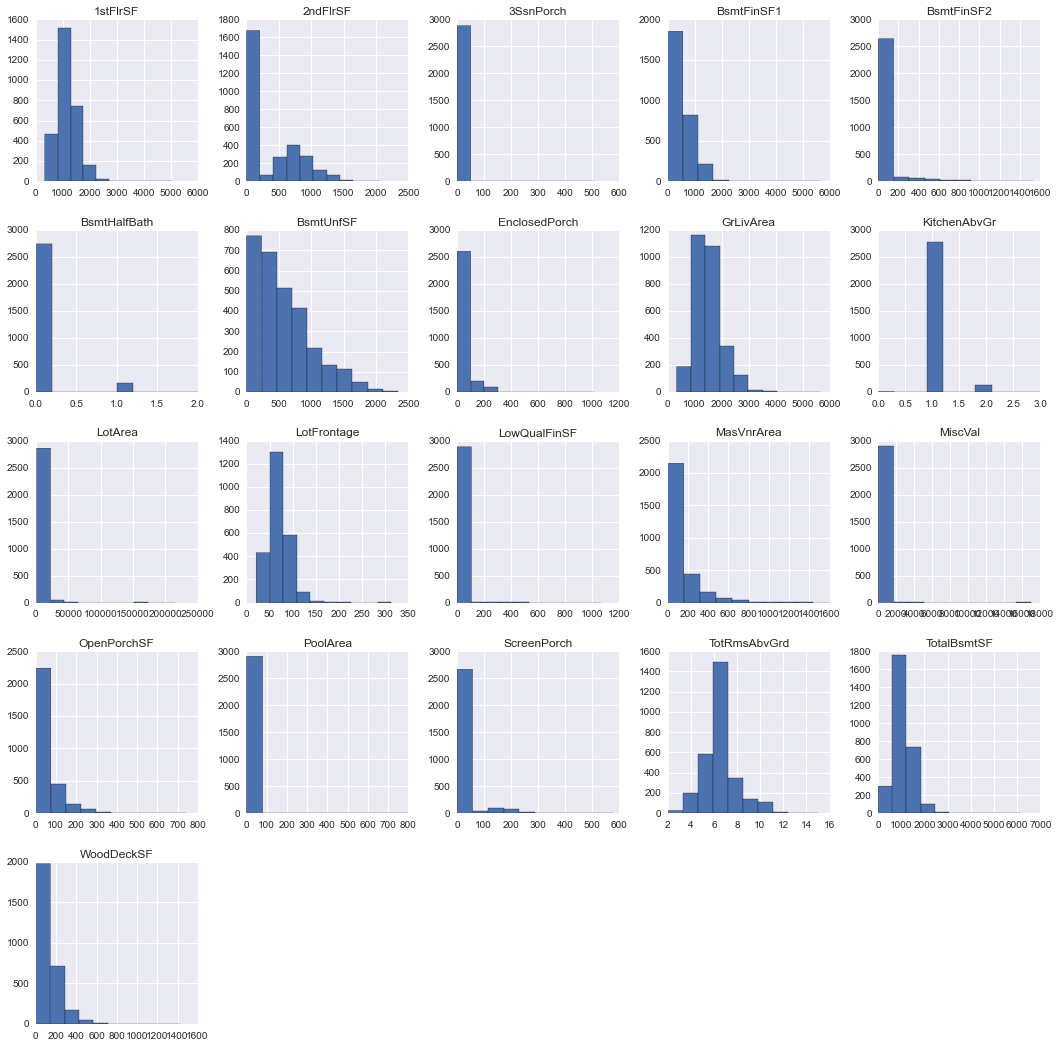

In [161]:
matplotlib.rcParams['figure.figsize'] = (18.0, 18.0)
all_data[skewed_feats].hist()

In [162]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b12da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d577cf8>]], dtype=object)

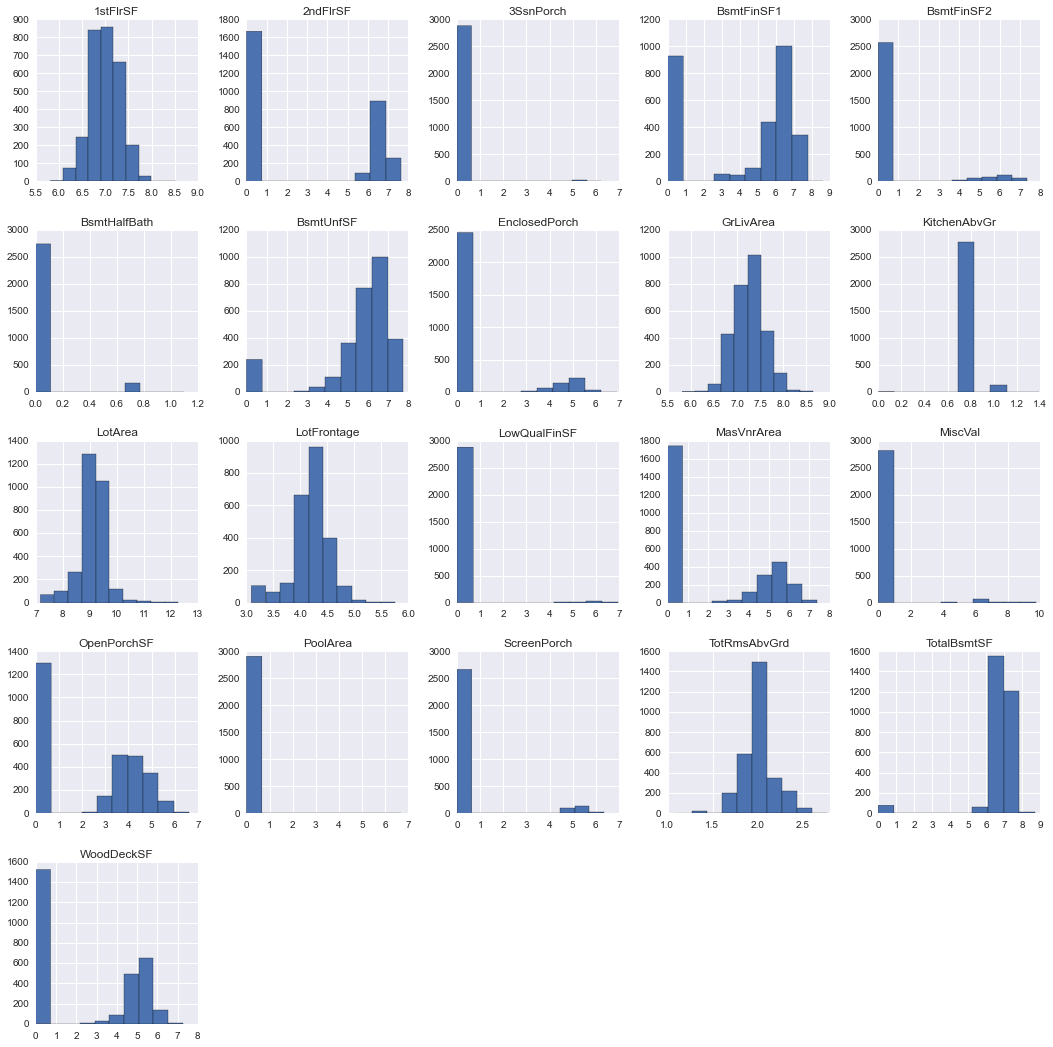

In [163]:
matplotlib.rcParams['figure.figsize'] = (18.0, 18.0)
all_data[skewed_feats].hist()

In [172]:
# GarageYrBlt
garageFeats = pd.Index([name for name in all_data.columns if u'Garage' in name])

In [173]:
garageFeats

Index(['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'GarageYrBlt'],
      dtype='object')

In [177]:
all_data.loc[all_data['GarageYrBlt'].isnull(), garageFeats].head(10)

GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
39            0           0        NaN          NaN        NaN        NaN   
48            0           0        NaN          NaN        NaN        NaN   
78            0           0        NaN          NaN        NaN        NaN   
88            0           0        NaN          NaN        NaN        NaN   
89            0           0        NaN          NaN        NaN        NaN   
99            0           0        NaN          NaN        NaN        NaN   
108           0           0        NaN          NaN        NaN        NaN   
125           0           0        NaN          NaN        NaN        NaN   
127           0           0        NaN          NaN        NaN        NaN   
140           0           0        NaN          NaN        NaN        NaN   

     GarageYrBlt  
39           NaN  
48           NaN  
78           NaN  
88           NaN  
89           NaN  
99           NaN  
108          NaN  
125          NaN  
127          NaN  
140          NaN

In [188]:
for name in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data.loc[all_data['GarageType'].isnull(),[name]] = 0

In [189]:

# Now let's handle LotFrontage
lotFeats = [name for name in all_data.columns if u'Lot' in name]
all_data.loc[all_data['LotFrontage'].isnull(), lotFeats].head()


LotArea LotConfig  LotFrontage LotShape
7   9.247925    Corner          NaN      IR1
12  9.470317    Inside          NaN      IR2
14  9.298443    Corner          NaN      IR1
16  9.327412   CulDSac          NaN      IR1
24  9.017605    Inside          NaN      IR1

In [190]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

/Users/yoichi.yamakawa/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


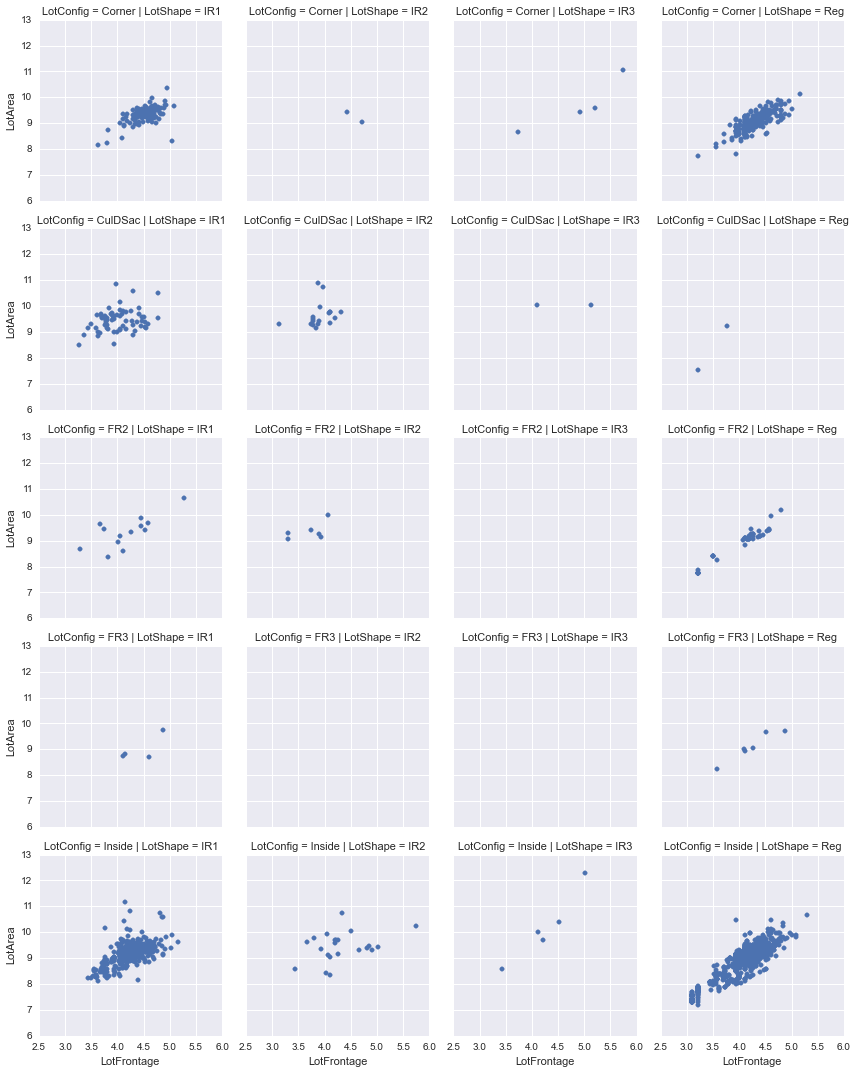

In [194]:
facet = sns.FacetGrid(all_data.loc[all_data['LotFrontage'].notnull(), lotFeats], row = 'LotConfig', col='LotShape')
facet.map(plot.scatter, "LotFrontage", "LotArea")